### BUFN400 Fall 2023---University of Maryland 

# Homework 5: Portfolio Optimization and Predicting Returns with OLS Regressions

### By James Zhang 

### November 27, 2023

#### There are probably some typos in in this homework since this is the first time I have used this particular problem set.  Please send me an email if you find typos!!


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
sp_df = pd.read_csv("sp500.csv")
treasury_df = pd.read_csv("treasury.csv")

# Problem 0

(This problem is almost the same as for Homework 1. You are welcome to cut and paste from that homework.)

1. Under "CRSP" / "Annual Update" / "Index / Treasury and Inflation", download "US Treasury and Inflation Indexes". Choose the entire time period, monthly data, and "Both" (return and level), all variables. Show the number of rows and columns, the names of the columns, and the first few rows of data.

In [115]:
print(f"Number of rows: {treasury_df.shape[0]}, and number of columns: {treasury_df.shape[1]}")
print(f"The columns names are {[column for column in treasury_df.columns]}")
treasury_df.head()

Number of rows: 1165, and number of columns: 21
The columns names are ['caldt', 'b30ret', 'b30ind', 'b20ret', 'b20ind', 'b10ret', 'b10ind', 'b7ret', 'b7ind', 'b5ret', 'b5ind', 'b2ret', 'b2ind', 'b1ret', 'b1ind', 't90ret', 't90ind', 't30ret', 't30ind', 'cpiret', 'cpiind']


,caldt,b30ret,b30ind,b20ret,b20ind,b10ret,b10ind,b7ret,b7ind,b5ret,...,b2ret,b2ind,b1ret,b1ind,t90ret,t90ind,t30ret,t30ind,cpiret,cpiind
0,1925-12-31,NaN,50.27088,NaN,49.26875,NaN,46.97544,NaN,40.4141,NaN,...,NaN,39.54598,NaN,39.84357,NaN,34.83693,NaN,38.91082,NaN,42.1
1,1926-01-30,NaN,50.27088,NaN,49.26875,NaN,46.97544,NaN,40.4141,NaN,...,NaN,39.54598,NaN,39.84357,0.004042,34.97774,0.002951,39.02565,0.000000,42.1
2,1926-02-27,NaN,50.27088,NaN,49.26875,NaN,46.97544,NaN,40.4141,NaN,...,NaN,39.54598,NaN,39.84357,0.003237,35.09096,0.002768,39.13367,0.000000,42.1
3,1926-03-31,NaN,50.27088,NaN,49.26875,NaN,46.97544,NaN,40.4141,NaN,...,NaN,39.54598,NaN,39.84357,0.002778,35.18843,0.002778,39.24238,-0.005587,41.9
4,1926-04-30,NaN,50.27088,NaN,49.26875,NaN,46.97544,NaN,40.4141,NaN,...,NaN,39.54598,NaN,39.84357,0.003072,35.29653,0.003072,39.36293,0.005618,42.1


2. Under "CRSP" / "Annual Update" / Index / S&P 500 Indexes", download "CRSP Index File on the S&P 500". Choose the entire time period, monthly data, and all variables.  Show the number of rows and columns, the names of the columns, and the first few rows of data.

In [116]:
print(f"Number of rows: {sp_df.shape[0]}, and number of columns: {sp_df.shape[1]}")
print(f"The columns names are {[column for column in sp_df.columns]}")
sp_df.head()

Number of rows: 1165, and number of columns: 11
The columns names are ['caldt', 'vwretd', 'vwretx', 'ewretd', 'ewretx', 'totval', 'totcnt', 'usdval', 'usdcnt', 'spindx', 'sprtrn']


,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
0,1925-12-31,NaN,NaN,NaN,NaN,15236829.5,89,NaN,NaN,12.46,NaN
1,1926-01-30,-0.001783,-0.003980,0.006457,0.003250,15277664.0,89,15236829.5,79.0,12.74,0.022472
2,1926-02-27,-0.033296,-0.037876,-0.039979,-0.042451,14712894.9,89,15277664.0,81.0,12.18,-0.043956
3,1926-03-31,-0.057708,-0.062007,-0.067915,-0.073275,14012079.2,89,14712894.9,81.0,11.46,-0.059113
4,1926-04-30,0.038522,0.034856,0.031441,0.027121,14500482.2,89,14012079.2,82.0,11.72,0.022688


3. Merge the two monthly datasets by date into one dataset. Show the number of rows and columns, the names of the columns, and the first few rows of data. (Hint: If the dates do not match exactlly in the merge, you might merge by YYYMM instead of YYYMMDD.)

* Hint: To merge data, you need a key (date). An example of merging data was covered in the Python bootcamp. When unexpeted issues  arise, the options `how='outer'` and `indicator=True` can be helpful for diagnosing problems. To make dates line up correctly, consider using `pd.tseries.offsets.MonthEnd(...)`.


In [117]:
# Convert 'caldt' to datetime in both dataframes
sp_df['caldt'] = pd.to_datetime(sp_df['caldt']) + pd.tseries.offsets.MonthBegin()
treasury_df['caldt'] = pd.to_datetime(treasury_df['caldt']) + pd.tseries.offsets.MonthBegin()
df = pd.merge(sp_df, treasury_df, on='caldt', how='outer')
print(f"Number of rows: {df.shape[0]}, and number of columns: {df.shape[1]}")
print(f"The columns names are {[column for column in df.columns]}")
df.head()

Number of rows: 1165, and number of columns: 31
The columns names are ['caldt', 'vwretd', 'vwretx', 'ewretd', 'ewretx', 'totval', 'totcnt', 'usdval', 'usdcnt', 'spindx', 'sprtrn', 'b30ret', 'b30ind', 'b20ret', 'b20ind', 'b10ret', 'b10ind', 'b7ret', 'b7ind', 'b5ret', 'b5ind', 'b2ret', 'b2ind', 'b1ret', 'b1ind', 't90ret', 't90ind', 't30ret', 't30ind', 'cpiret', 'cpiind']


,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,...,b2ret,b2ind,b1ret,b1ind,t90ret,t90ind,t30ret,t30ind,cpiret,cpiind
0,1926-01-01,NaN,NaN,NaN,NaN,15236829.5,89,NaN,NaN,12.46,...,NaN,39.54598,NaN,39.84357,NaN,34.83693,NaN,38.91082,NaN,42.1
1,1926-02-01,-0.001783,-0.003980,0.006457,0.003250,15277664.0,89,15236829.5,79.0,12.74,...,NaN,39.54598,NaN,39.84357,0.004042,34.97774,0.002951,39.02565,0.000000,42.1
2,1926-03-01,-0.033296,-0.037876,-0.039979,-0.042451,14712894.9,89,15277664.0,81.0,12.18,...,NaN,39.54598,NaN,39.84357,0.003237,35.09096,0.002768,39.13367,0.000000,42.1
3,1926-04-01,-0.057708,-0.062007,-0.067915,-0.073275,14012079.2,89,14712894.9,81.0,11.46,...,NaN,39.54598,NaN,39.84357,0.002778,35.18843,0.002778,39.24238,-0.005587,41.9
4,1926-05-01,0.038522,0.034856,0.031441,0.027121,14500482.2,89,14012079.2,82.0,11.72,...,NaN,39.54598,NaN,39.84357,0.003072,35.29653,0.003072,39.36293,0.005618,42.1


# Problem 1

Consider the problem of forming an optimal portfolio consisting of various sets of assets. Suppose the investor has log utility. Use the sample means, variances, and covariances to form estimates of the "true" means and variance. Under the assumption that the sample means, variances, and covariance are the best estimates of the "true" means, variances, and covariances, calculate optimal portfolio weights for the various assets as a fraction of invested wealth. Also calculate the "certainty equivalent" value of the opportunity to invest in these assets.  Perform the calculations for for the following sets of assets:

### Solution

1. T-bills and the value-weighted SP500.

Here, we have treasury bills, a riskless asset, and the value-weighted SP500, which is a risky asset. We have previously proves in class that log utility investors choose the growth-optimal portfolio, which maximizes internal rate of return, in this situation.
$$x = \frac{\pi}{\sigma^2}$$

In [118]:
def growth_optimal_portfolio(risk_free_asset: pd.Series, risky_asset: pd.Series):
    """
    Helper function that calculates growth optimal allocation in the risky asset and 
    certainty equivalent
    """
    # Calculate risk free, risk premium, annual variance
    rf = risk_free_asset.mean()
    pi = (risky_asset - risk_free_asset).mean()
    annual_variance = risky_asset.var()
    x = pi / annual_variance
    certainty_equivalent = rf + x * pi
    return x, certainty_equivalent

In [119]:
"""
1. T-bills and value-weighted SP500
"""
x, certainty_equivalent = growth_optimal_portfolio(df["t30ret"], df["vwretx"])
print(f"Optimal weights: equal={round(x, 4)}, T-bills={round(1-x, 4)}")
print(f"Certainty equivalent = {certainty_equivalent}")

Optimal weights: equal=1.2399, T-bills=-0.2399
Certainty equivalent = 0.007179162810353686


2. T-bills and equally-weighted SP500.

This example is very similar to the one above.

In [120]:
"""
2. T-bills and equally-weighted SP500
"""
(x), certainty_equivalent = growth_optimal_portfolio(df["t30ret"], df["ewretx"])
print(f"Optimal weights: equal={round(x, 4)}, T-bills={round(1-x, 4)}")
print(f"Certainty equivalent = {certainty_equivalent}")

Optimal weights: equal=1.2817, T-bills=-0.2817
Certainty equivalent = 0.010074896048313105


3. T-bills, the value-weighted SP500, and the equally-weighted SP500.



In [121]:
def two_risky_assets(risk_free: pd.Series, asset: pd.Series, market: pd.Series):
    rf = risk_free.mean() * 12
    pi_a = (asset - risk_free).mean()
    pi_m = (market - risk_free).mean()
    # Let asset be some asset and let market be the "market index"
    # Drop nans in case we don't have data for either of the assets
    df = pd.DataFrame({"asset": asset, "market": market}).dropna()
    asset, market = df["asset"], df["market"]
    # Finding alpha, beta, and variances
    r_a, r_m = asset.mean(), market.mean()
    cov_matrix = np.cov(asset, market)
    beta_a = cov_matrix[0][1] / cov_matrix[1][1]
    alpha_a = r_a - rf - beta_a * (r_m - rf)
    var_a, var_m = asset.var(), market.var()
    # Finding optimal weights
    x_a = alpha_a / var_a
    x_m = (pi_m / var_m) - beta_a * x_a    
    certainty_equivalent = rf + x_a * (alpha_a + beta_a * pi_a) + x_m * pi_m
    return (x_a, x_m, - 1 * (x_a + x_m - 1)), certainty_equivalent

In [122]:
"""
3. T-bills, the value-weighted SP500, and the equally-weighted SP500.
"""
weights, certainty_equivalent = two_risky_assets(df["t30ret"], df["ewretx"], df["vwretx"])
(x_a, x_m, x_f) = weights
print(f"Note that we are not leveraged: {sum(weights)}")
# Printing out weights and expected portfolio returns
print(f"Optimal weights: equal-weighted SP={round(x_a, 4)}, value-weighted SP={round(x_m, 4)}, T-bills={round(x_f, 4)}")
print(f"Certainty equivalent = {certainty_equivalent}")

Note that we are not leveraged: 1.0
Optimal weights: equal-weighted SP=1.5208, value-weighted SP=-0.5621, T-bills=0.0413
Certainty equivalent = 0.05069628902747408


4. T-bills, the value-weighted SP500, and UST 10-year notes.

In [123]:
"""
4. T-bills, the value-weighted SP500, and the UST 10-year notes
"""
weights, certainty_equivalent = two_risky_assets(df["t30ret"], df["b10ret"], df["vwretx"])
(x_a, x_m, x_f) = weights
print(f"Note that we are not leveraged: {sum(weights)}")
# Printing out weights and expected portfolio returns
print(f"Optimal weights: 10Y Note={round(x_a, 4)}, Value-Weighted SP500={round(x_m, 4)}, T-bills={round(x_f, 4)}")
print(f"Certainty equivalent = {certainty_equivalent}")

Note that we are not leveraged: 1.0
Optimal weights: 10Y Note=-67.3953, Value-Weighted SP500=4.8821, T-bills=63.5132
Certainty equivalent = 1.8416190146986566


5. T-bills, the value-weighted SP500, the equally-weighted SP500, and UST 10-year notes.

In [124]:
def fsolve_svd(pi, sigma, rtol=1e-15, num_polish=1):
    u, s, vt = np.linalg.svd(sigma, full_matrices=False, hermitian=True)
    sinv = np.where(s > rtol, 1.00 / s, 0.00)
    x = vt.T @ (sinv * (u.T @ pi))
    # Polish solution:
    for _ in range(num_polish):
        x = x + vt.T @ (sinv * (u.T @ (pi - sigma @ x)))
    return x

def many_risky_assets(risk_free, assets: pd.DataFrame):
    N = len(assets)
    R, rf = assets.mean() * 12, risk_free.mean() * 12
    pi = R - rf
    sigma = np.cov(assets.dropna().T)
    x = fsolve_svd(pi, sigma, rtol=1e-14, num_polish=2)
    certainty_equivalent = rf + np.transpose(R - rf) @ x
    return x, certainty_equivalent

In [125]:
"""
4. T-bills, the value-weighted SP500, equally-weighted SP500 and the UST 10-year notes
"""
rf = df["t30ret"].mean()
weights, certainty_equivalent = many_risky_assets(df["t30ret"], df[["vwretx", "ewretx", "b10ret"]])
weights = list(weights)
weights.insert(0, 1 - sum(weights))
print(f"Note that we are not leveraged: {sum(weights)}")
# Printing out weights and expected portfolio returns
print(f"Optimal weights: T-bills={weights[0]}, value={weights[1]}, equal={weights[2]}, 10Y note={weights[3]}")
print(f"Certainty equivalent = {certainty_equivalent + weights[0] * rf}")

Note that we are not leveraged: 0.9999999999999929
Optimal weights: T-bills=-58.521054177093454, value=-68.73849690737207, equal=84.36570747085986, 10Y note=43.89384361360566
Certainty equivalent = 3.537930598202673


# Problem 2

1. Consider a linear regression of the excess return of the equally-weighted index on the excess return of the value-weighted index using the 30-day T-bill return as the risk-free rate: 
$$
R_t^{\text{ewretd}} - R_t^{\text{t30}} = \alpha + \beta \cdot (R_t^{\text{vwretd}} - R_t^{\text{t30}}) + \epsilon .
$$
For a training dataset consisting of the first half of the data, calculate estimates of $\alpha$ and $\beta$ using OLS. Also calculate estimates of the means and variances of the two excess returns and the variance of the residuals. Construct a scatter plot of the two excess returns and show the fitted regression line on the same plot.  

Estimates of alpha = 0.0003215330192830636, beta = 1.1094286916133282
Estimates for value weighted excess returns are mean = 0.008135632390745502 and variance = 0.001421472592078231
Estimates for equal weighted excess returns are mean = 0.00934743701799486 and variance = 0.0020232498616959047
Estimates for the variance of the residuals = 0.00027365587729070583


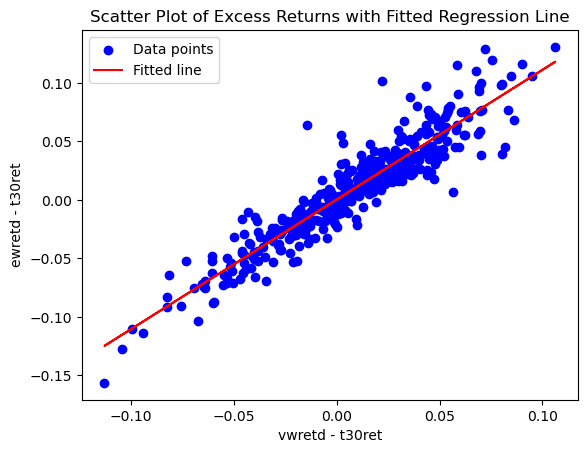

In [126]:
# Using Linear Regression model from Sklearn
training = df.iloc[:int(len(df) / 2)].dropna()
testing = df.iloc[int(len(df) / 2):].dropna()
X = np.array(training["vwretd"] - training["t30ret"]).reshape(-1, 1)
y = np.array(training["ewretd"] - training["t30ret"]).reshape(-1, 1)
model = LinearRegression().fit(X, y)
beta = model.coef_[0][0]
alpha = model.intercept_[0]
residuals = y - model.predict(X)

# Printing out estimates for the model
print(f"Estimates of alpha = {alpha}, beta = {beta}")
print(f"Estimates for value weighted excess returns are mean = {X.mean()} and variance = {X.var()}")
print(f"Estimates for equal weighted excess returns are mean = {y.mean()} and variance = {y.var()}")
print(f"Estimates for the variance of the residuals = {residuals.var()}")

# Calculate predicted values
predicted = model.predict(X)

# Create scatter plot
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predicted, color='red', label='Fitted line')

# Add labels and title
plt.xlabel('vwretd - t30ret')
plt.ylabel('ewretd - t30ret')
plt.title('Scatter Plot of Excess Returns with Fitted Regression Line')
plt.legend()

# Show the plot
plt.show()


2. Calculate the approximately optimal portfolio and the Sharpe ratio for a hypothetical log-utility investor who uses the estimated regression coefficients, means, and variances as if they were the correct theoretical coefficients and variances.  Explain why the Sharpe ratio is likely to be a biased estimate of more realistic portfolio performance.

In [127]:
def two_risky_assets_linear_regression(risk_free: pd.Series, asset: pd.Series, market: pd.Series, training: bool):
    rf = risk_free.mean()
    pi_a, pi_m = (asset - risk_free).mean(), (market - risk_free).mean()
    asset_var, market_var = asset.var(), market.var()
    # Let asset be some asset and let market be the "market index"
    # Drop nans in case we don't have data for either of the assets
    df = pd.DataFrame({"asset": asset, "market": market}).dropna()
    asset, market = df["asset"], df["market"]
    # Calculate estimates of variances, alphas, betas
    X = np.array(asset - risk_free).reshape(-1, 1)
    y = np.array(market - risk_free).reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    beta_a = model.coef_[0][0]
    alpha_a = model.intercept_[0] if training else model.intercept_[0] / 2
    # Finding optimal weights
    x_a = alpha_a / asset_var
    x_m = (pi_m / market_var) - beta_a * x_a    
    mean = rf + x_a * (alpha_a + beta_a * pi_a) + x_m * pi_m
    var = ((beta_a * x_a + x_m) ** 2) * market_var + (x_a ** 2 * asset_var)
    return x_a, x_m, 1 - x_a - x_m, mean, var

In [128]:
x_a, x_m, x_f, mean, var = two_risky_assets_linear_regression(training["t30ret"], training["ewretd"], training["vwretd"], True)
rf = training["t30ret"].mean()
print(f"Note that we are not leveraged: {x_a + x_m + x_f}")
# Printing out weights and expected portfolio returns
print(f"Optimal weights: equal-weighted SP={round(x_a, 4)}, value-weighted SP={round(x_m, 4)}, T-bills={round(x_f, 4)}")
portfolio_mean = (mean + x_f * rf)
portfolio_std = np.sqrt(var)
print(f"Portfolio expected excess return = {portfolio_mean}, standard deviation = {portfolio_std}")
print(f"Portfolio sharpe ratio = {(portfolio_mean - rf) / portfolio_std}")

Note that we are not leveraged: 1.0
Optimal weights: equal-weighted SP=0.4249, value-weighted SP=5.4808, T-bills=-4.9057
Portfolio expected excess return = 0.039535986225029046, standard deviation = 0.21827705705760328
Portfolio sharpe ratio = 0.1711450372833192


The Sharpe Ratio is likely a biased estimate of more realistic portfolio performance because we calculate the optimal weights over the course of the training period and then apply those optimal portfolio weights to the same period. Essentially, we have a large look-forward bias. Instead, we should test these weights on the testing period.

3. Plot the realized Sharpe ratio and realized internal rate of return achieved by various portfolio investing fraction $x$ in the equally-weighted index and $1-x$ in the value-weighted index.

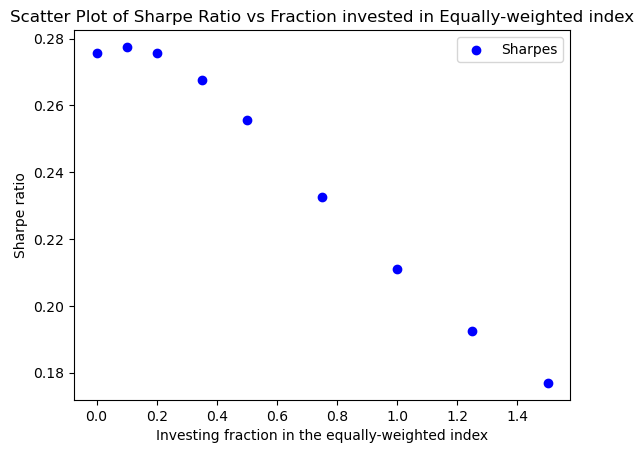

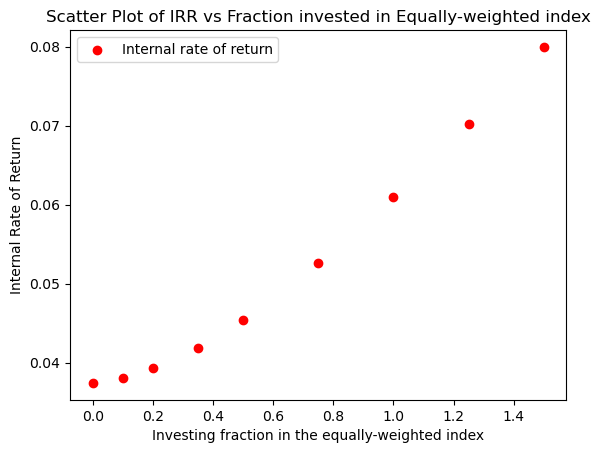

In [129]:
weights = [0, 0.1, 0.2, 0.35, 0.5, 0.75, 1, 1.25, 1.5]
rf = training["t30ret"].mean()
pi_a = training["ewretd"].mean() - rf
pi_m = training["vwretd"].mean() - rf
asset_var, market_var = training["ewretd"].var(), training["vwretd"].var()
sharpes = []
irr = []
for x in weights:
    mean = rf + x * (alpha + beta * pi_a) + (1-x) * pi_m
    var = (beta * x + (1-x)) ** 2 * market_var + (x ** 2 * asset_var)
    std = np.sqrt(var)
    sharpes.append(mean/ std)
    irr.append(std)

plt.scatter(weights, sharpes, color='blue', label='Sharpes')
plt.xlabel('Investing fraction in the equally-weighted index')
plt.ylabel('Sharpe ratio')
plt.title('Scatter Plot of Sharpe Ratio vs Fraction invested in Equally-weighted index')
plt.legend()
plt.show()

plt.scatter(weights, irr, color='red', label='Internal rate of return')
plt.xlabel('Investing fraction in the equally-weighted index')
plt.ylabel('Internal Rate of Return')
plt.title('Scatter Plot of IRR vs Fraction invested in Equally-weighted index')
plt.legend()
plt.show()

Now consider how to use the second half of the data to test the model.  Predicting future returns is difficult. Specifically, the estimated mean return on the two indexes are subject to error because the return standard deviations each month are large relative to the monthly means. To apply the model to the test data, use for a predicted value of $\alpha$ some fraction of the estimate of $\alpha$ from the OLS regression. An reasonable but simplistic ad hoc value might be one-half the estimated $\alpha$. Using one-half of the estimated $\alpha$ is a simplistic, ad hoc way to approximate a Bayesian adjustment based on an initial belief that the unknown true $\alpha$ has an expected value equal to of zero and the variance of this initial estimate is the same as the variance of the difference between the true $\alpha$ and its OLS estimate. More generally, instead of using weights of one half, one might use weights inversely proportional to the variance of the errors of the prior estimate (of zero) and the variance of the error from the OLS estimate.

Instead of also deflating the risk premium on the value-weighted index by a factor of one half, it would be appropriate not to deflate it at all if our initial expectation was that the risk premium was likely to be different from zero and probably positive. 

4. Using this "conservative" estimate of $\alpha$ (deflated by one half), calculate the optimal portfolio for the log-utility investor, plot the returns on this portfolio, and calculate the achieved Sharpe ratio.


In [130]:
rf = testing["t30ret"].mean()
pi_a, pi_m = (testing["vwretd"]- testing["t30ret"]).mean(), (testing["ewretd"] - testing["t30ret"]).mean()
asset_var, market_var = testing["ewretd"].var(), testing["vwretd"].var()
# Let asset be some asset and let market be the "market index"
# Drop nans in case we don't have data for either of the assets
# Calculate estimates of variances, alphas, betas
modified_alpha = alpha / 2
# Finding optimal weights
x_a = modified_alpha / asset_var
x_m = (pi_m / market_var) - beta * x_a
x_f = 1 - x_a - x_m    
mean = rf + x_a * (modified_alpha + beta * pi_a) + x_m * pi_m
var = ((beta * x_a + x_m) ** 2) * market_var + (x_a ** 2 * asset_var)

print(f"Note that we are not leveraged: {x_a + x_m + x_f}")
# Printing out weights and expected portfolio returns
print(f"Optimal weights: value-weighted SP={round(x_a, 4)}, equal-weighted SP={round(x_m, 4)}, T-bills={round(x_f, 4)}")
portfolio_mean = (mean + x_f * rf)
portfolio_std = np.sqrt(var)
print(f"Portfolio expected excess return = {portfolio_mean}, standard deviation = {portfolio_std}")
print(f"Portfolio sharpe ratio = {(portfolio_mean - rf) / portfolio_std}")

Note that we are not leveraged: 1.0000000000000004
Optimal weights: value-weighted SP=0.0629, equal-weighted SP=4.1841, T-bills=-3.247
Portfolio expected excess return = 0.0284255295565398, standard deviation = 0.19092791841432818
Portfolio sharpe ratio = 0.1305100017685465


5. Also calculate OLS estimates for the test dataset. Provide an intuitive discussion of whether deflating the estimates of $\alpha$ by one-half was a good idea.


In [131]:
print(f"Training estimate for alpha = {alpha}, and modified alpha = {modified_alpha}")
# Using Linear Regression model from Sklearn
testing = df.iloc[int(len(df) / 2):].dropna()
X = np.array(testing["vwretd"] - testing["t30ret"]).reshape(-1, 1)
y = np.array(testing["ewretd"] - testing["t30ret"]).reshape(-1, 1)
model = LinearRegression().fit(X, y)
beta = model.coef_[0][0]
alpha = model.intercept_[0]
residuals = y - model.predict(X)

# Printing out estimates for the model
print(f"Estimates of alpha = {alpha}, beta = {beta}")
print(f"Estimates for value weighted excess returns are mean = {X.mean()} and variance = {X.var()}")
print(f"Estimates for equal weighted excess returns are mean = {y.mean()} and variance = {y.var()}")
print(f"Estimates for the variance of the residuals = {residuals.var()}")


rf = testing["t30ret"].mean()
pi_a, pi_m = (testing["ewretd"]- testing["t30ret"]).mean(), (testing["vwretd"] - testing["t30ret"]).mean()
asset_var, market_var = testing["ewretd"].var(), testing["vwretd"].var()
# Finding optimal weights
x_a = alpha / asset_var
x_m = (pi_m / market_var) - beta * x_a
x_f = 1 - x_a - x_m    
mean = rf + x_a * (modified_alpha + beta * pi_a) + x_m * pi_m
var = ((beta * x_a + x_m) ** 2) * market_var + (x_a ** 2 * asset_var)

print(f"Note that we are not leveraged: {x_a + x_m + x_f}")
# Printing out weights and expected portfolio returns
print(f"Optimal weights: value-weighted SP={round(x_a, 4)}, equal-weighted SP={round(x_m, 4)}, T-bills={round(x_f, 4)}")
portfolio_mean = (mean + x_f * rf)
portfolio_std = np.sqrt(var)
print(f"Portfolio expected excess return = {portfolio_mean}, standard deviation = {portfolio_std}")
print(f"Portfolio sharpe ratio = {(portfolio_mean - rf) / portfolio_std}")

Training estimate for alpha = 0.0003215330192830636, and modified alpha = 0.0001607665096415318
Estimates of alpha = 0.0016415199723159996, beta = 1.0703154379172415
Estimates for value weighted excess returns are mean = 0.006470495711835335 and variance = 0.0020213104301058994
Estimates for equal weighted excess returns are mean = 0.00856699142367067 and variance = 0.0025613540446019845
Estimates for the variance of the residuals = 0.000245791072433518
Note that we are not leveraged: 1.0
Optimal weights: value-weighted SP=0.6426, equal-weighted SP=2.5251, T-bills=-2.1677
Portfolio expected excess return = 0.018238674917089623, standard deviation = 0.14779738542753612
Portfolio sharpe ratio = 0.09967123767349229


The old alpha and the modified alpha in the training dataset by dividing by 2 would not be a good fit for the testing dataset because the alpha obtained in the testing dataset is actually about 10x greater than the modified alpha in the testing dataset. This is a big difference in the wrong direction, so the modification is not a good idea.

6. (Extra Credit) Implement the methodology for this problem in a more sophisticated manner by using for any month a training dataset consisting of all previous months.

Hints: Write the OLS regression as a function which can be called more than once. Let the beginning and ending dates used in the regression be function arguments. Also let the ad hoc Bayesian parameter (of one half) be a function argument.

# Problem 3

This problem will consider how to use market information to forecast returns on a market index.

Define three "signals" (dividend yield, past returns, volatility) which might be used to forecast returns on three market indexes (value-weighted, equally-weighted, and SP500):

1. Construct the past year's dividend yield on each index as a monthly time series starting one year after the beginning of the data. (Hint: Each month's dividend yield can be approximated from the difference between returns with and without dividends; a simple approximation to the dividend yield is the sum of these differences.)

# How is this problem possible given the dataset??

Note: The dataset does not contain data for the SP500 returns with and without dividends, so I don't know how I can construct this `dividend yield` factor?


In [132]:
dividend_yield = pd.DataFrame({
    "Value-Weighted Dividend Yield": (df["vwretd"] - df["vwretx"]).rolling(window=12).mean(), 
    "Equally-Weighted Dividend Yield": (df["ewretd"] - df["ewretx"]).rolling(window=12).mean()
}).iloc[12:]
dividend_yield

,Value-Weighted Dividend Yield,Equally-Weighted Dividend Yield
12,0.004308,0.004113
13,0.004347,0.004159
14,0.004378,0.004162
15,0.004413,0.004178
16,0.004284,0.004069
...,...,...
1160,0.001247,0.001492
1161,0.001273,0.001527
1162,0.001287,0.001535
1163,0.001337,0.001566


2. Construct a series of past long-term returns over the previous ten years. (The return over the previous ten years is the amount one dollar invested in the index ten years previously would be worth at the current date.) Define the signal as the log of this past ten-year return. Explain why taking the log might be a sensible empirical strategy for this problem.


In [135]:
past_10y = df.iloc[-121:]
returns = pd.DataFrame({"Value-Weighted Returns": np.log(np.cumprod(1 + past_10y["vwretx"])),
                        "Equally-Weighted Returns": np.log(np.cumprod(1 + past_10y["ewretx"])), 
                        "SP500 Returns": np.log(np.cumprod(1 + past_10y["sprtrn"]))})
returns

,Value-Weighted Returns,Equally-Weighted Returns,SP500 Returns
1044,0.005885,0.021189,0.007043
1045,0.055650,0.083844,0.056241
1046,0.066106,0.093802,0.067241
1047,0.101497,0.133970,0.102597
1048,0.119810,0.148819,0.120521
...,...,...,...
1160,1.031282,0.995858,1.027012
1161,0.933806,0.896086,0.928962
1162,1.010023,0.987463,1.005796
1163,1.060866,1.052142,1.058154


3. Use the daily dataset to construct an estimate for each month volatility by using the same standard deviation of the previous month's daily log returns.

# What daily dataset??? I do not see any announcement or directions about a daily dataset?

In [136]:
df["vwretx"].std()

0.054241924346335194

4. Now let $x_t$ denote one of the three signals constructed in 1, 2, 3 above, and let $r_t$ denote the excess return on one of the three indexes. Let $f(x)$ denote some transformation of the data; here we will use $f(x) = \frac{x - \bar{x}}{\sigma_x}$, where $\bar{x}$ is the sample mean of $x_t$ and $\sigma_x$ is the sample standard deviation of $x_t$. Consider the predictive regression 
$$
r_t = \alpha + \beta \cdot f(x_t) + \epsilon_t
$$
As before, divide the entire time period into a training period and testing period of equal length, calculate OLS estimates for $\alpha$ and $\beta$.


In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming 'df_monthly' is your DataFrame with monthly data and 'signal' is the column with your chosen signal
# Also assuming 'excess_return' is the column with your excess return data

# Standardize the signal
factor = (dividend_yield['Value-Weighted Dividend Yield'] - dividend_yield['Value-Weighted Dividend Yield'].mean()) / dividend_yield['Value-Weighted Dividend Yield'].std()

# Split the data into training and testing sets
split_point = len(df) // 2
train = df.iloc[:split_point]
test = df.iloc[split_point:]

# Fit the model on the training data
X_train = np.array(factor).reshape(-1, 1)
y_train = np.array(df["vwretx"] - df["t30ret"].reshape(-1, 1)
model = LinearRegression().fit(X_train, y_train)

# Get the alpha and beta estimates
alpha_estimate = model.intercept_
beta_estimate = model.coef_[0]

# Print out the estimates
print(f"Estimates of alpha: {alpha_estimate}")
print(f"Estimates of beta: {beta_estimate}")

5. Calculate an optimal portfolio under the assumptions that the estimated parameters are correct versions of the true parameters. Plot the returns on this portfolio against the returns on the index itself for the training period. Obviously, your market-timing model will beat a buy and hold strategy in the training period it was estimated on. (Note: Since there are three index portfolios and three signals, you might present 9 plots in a 3 x 3 grid if you have time.)


6. Now apply the model out of sample by dampening the estimate of $\beta$ by some ad hoc factor, such as one half. Calculate the optimal portfolio for a log utility investor. Plot the returns achieved out of sample for the estimated optimal portfolio. Calculate the Sharpe ratio for the optimal portfolio. Plot the Sharpe ratio achieved in the test period when the investor holds a fraction $x$ of wealth in the optimal portfolio and a fraction $1-x$ in the (untimed) index. 


7. Tell a brief economic, financial, or behavioral story from why you obtain the results above.

8. (Extra Credit) Generalize using past ten-year returns to using past returns over various different periods from one day to ten years. Do you find momentum over some periods and reversals over other periods.